In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Logistic Regression and Imbalanced Classes

## Abalone Data

In [4]:
df = pd.read_csv('abalone19.csv')
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,negative
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,negative
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,negative
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,negative
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,negative


The target variable is 'Class'. Check the distribution of values

In [5]:
print df.shape
df.Class.value_counts()

(4174, 9)


negative     4142
 positive      32
Name: Class, dtype: int64

Let's make 'Class' a boolean variable instead of a string.

In [7]:
df.Class

0        negative
1        negative
2        negative
3        negative
4        negative
5        negative
6        negative
7        negative
8        negative
9        positive
10       negative
11       negative
12       negative
13       negative
14       negative
15       negative
16       negative
17       negative
18       negative
19       negative
20       negative
21       negative
22       negative
23       negative
24       negative
25       negative
26       negative
27       negative
28       negative
29       negative
          ...    
4144     negative
4145     negative
4146     negative
4147     negative
4148     negative
4149     negative
4150     negative
4151     negative
4152     negative
4153     negative
4154     negative
4155     negative
4156     negative
4157     negative
4158     negative
4159     negative
4160     negative
4161     negative
4162     negative
4163     negative
4164     negative
4165     negative
4166     negative
4167     negative
4168     n

In [8]:
df['Class'] = df.Class == ' positive'

Keep track of different variable types

In [9]:
continuous = [
    'Length',
    'Diameter',
    'Whole_weight',
    'Shucked_weight',
    'Viscera_weight',
    'Shell_weight'
]
discrete = [
    'Sex'
]
predictors = continuous + discrete
target = 'Class'

## Train/Test Split

This time, let's separate X from y

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df[target], random_state=2)

## Feature Engineering

### Normalize the continuous features

In [11]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

#Fit only on training data so that test data is not contaminated
ss.fit(X_train[continuous])

#then transform both the test and training data based on the mean and variance only in the training data
X_train[continuous] = ss.transform(X_train[continuous])
X_test[continuous] = ss.transform(X_test[continuous])

In [12]:
X_train.head()

,Length,Diameter,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex
1067,-1.236238,-1.285376,-1.203345,-1.103296,-1.223797,-1.224836,I
3000,1.006980,0.977633,1.284357,1.036111,1.901695,1.260961,M
2724,-1.028533,-1.033931,-0.986671,-0.819975,-1.069788,-1.085945,I
3858,0.217699,0.575320,0.512835,-0.010168,0.121523,-0.348753,F
2395,0.923897,0.977633,1.018070,0.984801,0.646968,1.396291,I


### Binarize the categorical column

In [13]:
#Note, fit on training data ONLY then transform training and test data separately
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False) 
X_train = pd.DataFrame(
    dv.fit_transform(X_train.to_dict(orient='records')),
    columns = dv.feature_names_
    )

X_test = pd.DataFrame(
    dv.transform(X_test.to_dict(orient='records')),
    columns = dv.feature_names_
)

In [14]:
X_train.head()

,Diameter,Length,Sex=F,Sex=I,Sex=M,Shell_weight,Shucked_weight,Viscera_weight,Whole_weight
0,-1.285376,-1.236238,0.0,1.0,0.0,-1.224836,-1.103296,-1.223797,-1.203345
1,0.977633,1.006980,0.0,0.0,1.0,1.260961,1.036111,1.901695,1.284357
2,-1.033931,-1.028533,0.0,1.0,0.0,-1.085945,-0.819975,-1.069788,-0.986671
3,0.575320,0.217699,1.0,0.0,0.0,-0.348753,-0.010168,0.121523,0.512835
4,0.977633,0.923897,0.0,1.0,0.0,1.396291,0.984801,0.646968,1.018070


## Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Accuracy on test set

In [16]:
lr.score(X_test, y_test)

0.99329501915708818

### Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix

pred = lr.predict(X_test)
c = pd.DataFrame(
        confusion_matrix(pred, y_test), 
        columns=['Actual=0', 'Actual=1'], 
        index=['Predicted=0', 'Predicted=1']
)

print c

tpr = c.loc['Predicted=1', 'Actual=1'] / c.loc[:, 'Actual=1'].sum()
fpr = c.loc['Predicted=1', 'Actual=0'] / c.loc['Predicted=1', :].sum()

print
print
print "True positive rate (detection rate): {}".format(tpr)
print "False positive rate (false alarm rate): {}".format(fpr)

             Actual=0  Actual=1
Predicted=0      1037         7
Predicted=1         0         0


True positive rate (detection rate): 0
False positive rate (false alarm rate): 0


/Users/nwchen24/anaconda/envs/Machine_learning_python2/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in long_scalars


### Closer look at model

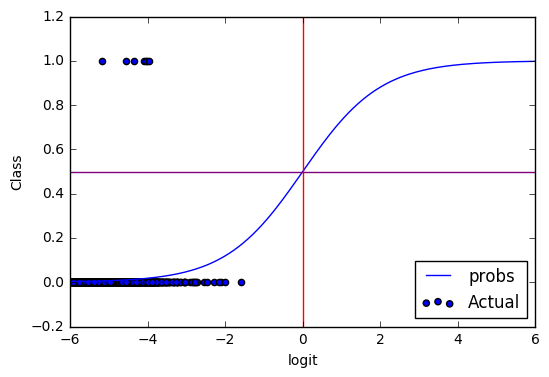

In [18]:
def logistic(x):
    return 1 / (1 + np.exp(-x))

# Inverse of logistic
def logit(p):
    return np.log(p / (1 - p))

# Full spectrum of model behavior
pltdf = pd.DataFrame({
        'Class': y_test,
        'pred': lr.predict_proba(X_test)[:, 1]
    })
pltdf['logit'] = pltdf.pred.apply(logit)
logits = np.linspace(-6, 6, 200)
probs = logistic(logits)

# Plot
ax = pd.DataFrame({'probs': probs}, index=logits).plot()
pltdf.plot(x='logit', y='Class', kind='scatter', ax=ax, label='Actual')
plt.legend(loc='lower right')
plt.axvline(x=0, color='red')
plt.axhline(y=logistic(0), color='purple')

#### Threshold: p >= 0.01

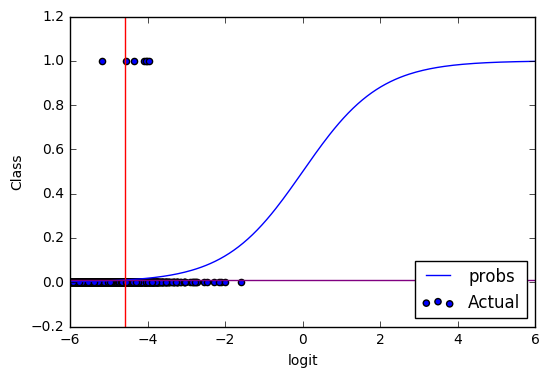

In [19]:
# ax = plt.plot(logits, probs, label='Predicted')
ax = pd.DataFrame({'probs': probs}, index=logits).plot()
pltdf.plot(x='logit', y='Class', kind='scatter', ax=ax, label='Actual')
plt.legend(loc='lower right')
plt.axvline(x=logit(.01), color='red')
plt.axhline(y=.01, color='purple')

In [20]:
pred = lr.predict_proba(X_test)[:, 1] >= .01
c = pd.DataFrame(
        confusion_matrix(pred, y_test), 
        columns=['Actual=0', 'Actual=1'], 
        index=['Predicted=0', 'Predicted=1']
)

print c

tpr = c.loc['Predicted=1', 'Actual=1'].astype(float) / c.loc[:, 'Actual=1'].sum()
fpr = c.loc['Predicted=1', 'Actual=0'].astype(float) / c.loc['Predicted=1', :].sum()

print
print
print "True positive rate (detection rate): {:.3}".format(tpr)
print "False positive rate (false alarm rate): {:.3}".format(fpr)

             Actual=0  Actual=1
Predicted=0       702         1
Predicted=1       335         6


True positive rate (detection rate): 0.857
False positive rate (false alarm rate): 0.982


## ROC Curve

Each point on the ROC curve is one confusion matrix, defined by one prediction threshold.

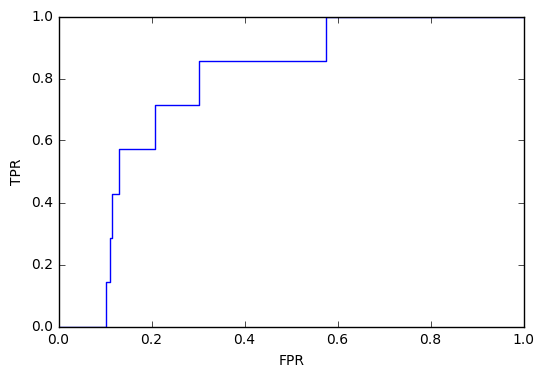

In [22]:
from sklearn.metrics import roc_curve
pred = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresh = roc_curve(y_test, pred)

plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

### Area under the Curve

In [23]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pred)

0.77958396473343439

## Try some other models

### Add polynomial coefficients

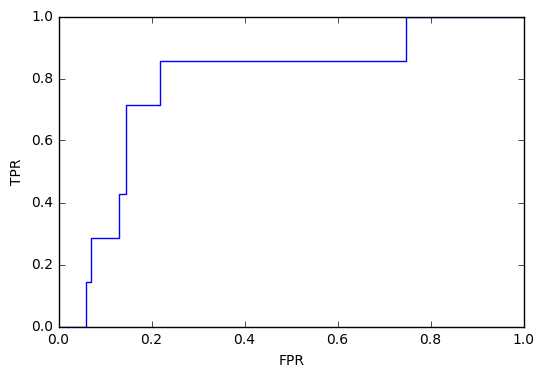

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegressionCV

poly = PolynomialFeatures(degree=3)
lrcv = LogisticRegressionCV(scoring='roc_auc')


from sklearn.pipeline import Pipeline
polylr = Pipeline([('poly', poly), ('logistic', lrcv)])

polylr.fit(X_train, y_train)

pred = polylr.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, pred)

fpr, tpr, thresh = roc_curve(y_test, pred)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

### Gradient Boosted Decision Trees

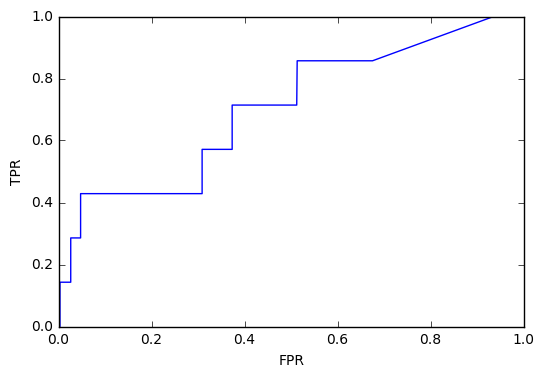

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

pred = gb.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, pred)

fpr, tpr, thresh = roc_curve(y_test, pred)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

## Compare all three models

Standard AUC: 0.78
Polynomial AUC: 0.784
Random Forest AUC: 0.703


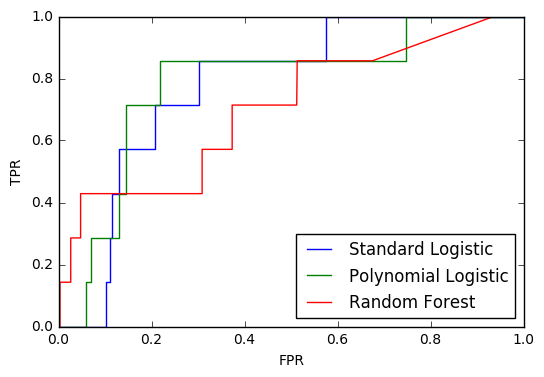

In [26]:
# Standard logistic regression
pred = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresh = roc_curve(y_test, pred)
standard_auc = roc_auc_score(y_test, pred)
plt.plot(fpr, tpr, label = 'Standard Logistic')

# Polynomial logistic regression
pred = polylr.predict_proba(X_test)[:, 1]
fpr, tpr, thresh = roc_curve(y_test, pred)
poly_auc = roc_auc_score(y_test, pred)
plt.plot(fpr, tpr, label = 'Polynomial Logistic')

# Random Forest
pred = gb.predict_proba(X_test)[:, 1]
fpr, tpr, thresh = roc_curve(y_test, pred)
rf_auc = roc_auc_score(y_test, pred)
plt.plot(fpr, tpr, label = 'Random Forest')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')

print "Standard AUC: {:.3}".format(standard_auc)
print "Polynomial AUC: {:.3}".format(poly_auc)
print "Random Forest AUC: {:.3}".format(rf_auc)